#3.a) Curvas p-delta


## Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt


##Presión efectiva vertical

In [2]:
# NZ: nivel donde queremos calcular la presión (m)
# NT: nivel del terreno (m)
# NF: nivel freático (m)
# NPS: nivel base Pampeano superior - techo Pampeano medio (m)
# Psat_PS: peso saturado Pampeano superior (kN/m3)
# Psat_PM: peso saturado Pampeano medio (kN/m3)

def f_sv_p(NZ,NF,NT,NPS,Psat_PS,Psat_PM): #función presión efectiva vertical
  Psum_PS = Psat_PS-10 #peso sumergido Pampeano superior
  Psum_PM = Psat_PM-10 #peso sumergido Pampeano medio
  z1 = NT-NPS
  z2 = NPS-NZ
  if NF>NT:
    sv_p=Psum_PS*z1+Psum_PM*z2
  elif NF<=NT and NZ>NF:
    sv_p=Psat_PS*z1+Psat_PM*z2
  elif NF<=NT and NF>=NPS:
    sv_p=Psat_PS*(NT-NF)+Psum_PS*(NF-NPS)+Psum_PM*(NPS-NZ)
  elif NF<=NT and NF<NPS:
    sv_p=Psat_PS*(NT-NPS)+Psat_PM*(NPS-NF)+Psum_PM*(NF-NZ)
  return sv_p



## Capacidad de carga por punta según Brinch Hansen

In [3]:
  # D: diámetro del pilote (m)
  # NT: nivel del terreno (m)
  # NF: nivel freático (m)
  # NP: nivel de la punta del pilote (m)
  # NPS: nivel base Pampeano superior - techo Pampeano medio (m)
  # fi_PS: ángulo de fricción efectivo Pampeano superior (deg)
  # c_PS: cohesión efectiva Pampeano superior (kPa)
  # Psat_PS: peso saturado Pampeano superior (kN/m3)
  # fi_PM: ángulo de fricción efectivo Pampeano medio (deg)
  # c_PM: cohesión efectiva Pampeano medio (kPa)
  # Psat_PM: peso saturado Pampeano medio (kN/m3)


def Qu_bh(D,NT,NF,NP,NPS,fi_PS,c_PS,Psat_PS,fi_PM,c_PM,Psat_PM):
    Ap=np.pi/4*(D**2) #area de la sección                          
    fi_PS_r = np.deg2rad(fi_PS) #ángulo de fricción Pampeano superior en radianes
    fi_PM_r = np.deg2rad(fi_PM) #ángulo de fricción Pampeano medio en radianes
    zp = NT-NP #longitud del pilote
    sv_p=f_sv_p(NP,NF,NT,NPS,Psat_PS,Psat_PM) #función de presión vertical con NZ=NP

    if NP>=NPS:
      Nq = np.e**(np.pi*np.tan(fi_PS_r))*np.tan(np.pi/4+(fi_PS_r)/2)**2 #fórmula Brinch-Hansen
      Nc = (Nq-1)*1/np.tan(fi_PS_r)
      dc = 1+0.4*np.arctan(zp/D)
      dq = 1+2*np.tan(fi_PS_r)*(1-np.sin(fi_PS_r))**2*np.arctan(zp/D)
      sc = 1+Nq/Nc
      sq = 1+np.tan(fi_PS_r)
      qu = c_PS*Nc*dc*sc + sv_p*Nq*sq*dq
      Qu = qu*Ap

    elif NP<NPS:
      Nq = np.e**(np.pi*np.tan(fi_PM_r))*np.tan(np.pi/4+(fi_PM_r)/2)**2 #fórmula Brinch-Hansen
      Nc = (Nq-1)*1/np.tan(fi_PM_r)
      dc = 1+0.4*np.arctan(zp/D)
      dq = 1+2*np.tan(fi_PM_r)*(1-np.sin(fi_PM_r))**2*np.arctan(zp/D)
      sc = 1+Nq/Nc
      sq = 1+np.tan(fi_PM_r)
      qu = c_PM*Nc*dc*sc + sv_p*Nq*sq*dq
      Qu = qu*Ap
 
    return Qu #Qu: resistencia última de la punta (kN)


## Capacidad de carga por fuste drenado

In [4]:
  # D: diámetro del pilote (m)
  # NT: nivel del terreno (m)
  # NF: nivel freático (m)
  # NP: nivel de la punta del pilote (m)
  # NPS: nivel base Pampeano superior - techo Pampeano medio (m)
  # K0_PS: coeficiente de empuje en reposo Pampeano superior
  # fi_PS: ángulo de fricción efectivo Pampeano superior (deg)
  # c_PS: cohesión efectiva Pampeano superior (kPa)
  # Psat_PS: peso saturado Pampeano superior (kN/m3)
  # K0_PM: coeficiente de empuje en reposo Pampeano medio
  # fi_PM: ángulo de fricción efectivo Pampeano medio (deg)
  # c_PM: cohesión efectiva Pampeano medio (kPa)
  # Psat_PM: peso saturado Pampeano medio (kN/m3)

def Qufdr(D,NP,NT,NPS,K0,Psat_PS,fi,Psat_PM,c):                             
    Up = np.pi*D   #perímetro de la sección 
    fi_r = np.deg2rad(fi) #ángulo de fricción en radianes
    K = min(K0,1)
    delta_r = 0.75*fi_r #fricción interfaz hormigón-terreno 
     
    z=np.linspace(NT,NP,num=100)#Integración de la resistencia por fuste 
    dz=z[0]-z[1] #calculo el dz
    Qufp=0 #creo una variable en donde voy a ir sumando las resistencias
 
    for i in range(z.size): #barro todos los puntos del pilote
      NZ=z[i] #me fijo en que cota estoy
      sv_p=f_sv_p(NZ,NF,NT,NPS,Psat_PS,Psat_PM) #calculo la presión vertical efectiva
      fs = K*sv_p*np.tan(delta_r) #calculo la resistencia a fricción unitaria
      Qufp=Qufp+(fs+c)*dz*Up #calculo la fuerza en un dz x el perímetro y lo sumo a la resistencia total
      
    return Qufp #Qufp: resistencia última por fuste (kN)




## Resultado


In [5]:
# Datos
D = 0.60        
NT = 0          
NF = -3         
NP = -12       
NPS = -8
K0_PS = 0.70
fi_PS = 32
c_PS = 10
Psat_PS= 19
K0_PM = 0.75
fi_PM = 37
c_PM = 30
Psat_PM= 19
E_PS = 50          
E_PM = 120
nu = 0.25 


In [6]:
# Resistencia por punta (Brinch-Hansen)
Qu_p1=Qu_bh(D,NT,NF,NP,NPS,fi_PS,c_PS,Psat_PS,33,c_PM,Psat_PM)
print(f'Resistencia por punta Brinch-Hansen: {Qu_p1:.0f} kN')

# Resistencia por fuste Pampeano superior
Qu_fs=Qufdr(D,-8,0,NPS,0.7,Psat_PS,32,Psat_PM,10)
# Resistencia por fuste Pampeano medio
Qu_fm=Qufdr(D,-12,-8,NPS,0.75,Psat_PS,37,Psat_PM,30)
# Resistencia fuste total
Qu_ft=Qu_fs+Qu_fm

print(f'Resistencia por fuste drenado PS: {Qu_fs:.0f} kN')
print(f'Resistencia por fuste drenado PM: {Qu_fm:.0f} kN')
print(f'Resistencia por fuste drenado Total: {Qu_ft:.0f} kN')

#Resistencia total
Qu_dr = Qu_p1 + Qu_ft

print(f'Resistencia última drenada: {Qu_dr:.0f} kN')

Resistencia por punta Brinch-Hansen: 3250 kN
Resistencia por fuste drenado PS: 438 kN
Resistencia por fuste drenado PM: 283 kN
Resistencia por fuste drenado Total: 721 kN
Resistencia última drenada: 3971 kN


##Curvas p-delta

Punta 1mm: 805.8883077815149
Fuste 1mm: 867.2824398909142
Total 1mm: 1673.1707476724291
Punta 40mm: 3689.814845572582
Fuste 40mm: 900.4368333580811
Total 40mm: 4590.251678930663


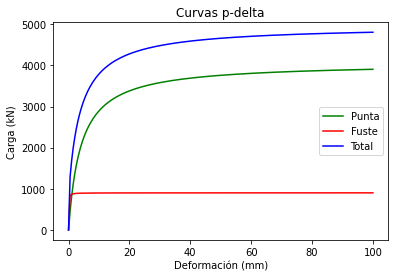

In [7]:
def kp(g,nu,r):
  kp=(2*np.pi*g*r)/(1-nu)
  return kp

def pdp(kp,deltap,Qu_p1):
  pdp=deltap/((1/kp)+((0.8*deltap)/Qu_p1))
  return pdp

def kf(g,l,h,nu,r):
  kf=(g*h*2*r*np.pi)/(r*np.log10(2*l*(1-nu)))
  return kf

def pdf_s(kf,deltap,Qu_fs):
  pdf_s=deltap/((1/kf)+((0.8*deltap)/Qu_fs))
  return pdf_s

def pdf_m(kf,deltap,Qu_fm):
  pdf_m=deltap/((1/kf)+((0.8*deltap)/Qu_fm))
  return pdf_m

kf_ps=kf(250000,8,8,0.25,0.3)
x_ps=np.linspace(0,0.1,200)
y_ps=pdf_s(kf_ps,x_ps,Qu_fs)

kf_pm=kf(400000,4,4,0.25,0.3)
x_pm=np.linspace(0,0.1,200)
y_pm=pdf_m(kf_pm,x_pm,Qu_fm)

kp_=kp(400000,0.25,0.3)
x=np.linspace(0,0.1,200)
y=pdp(kp_,x,Qu_p1)

plt.plot(x*1000,y,"g", label="Punta")
plt.plot(x*1000,y_pm+y_ps,"r", label="Fuste")
plt.plot(x*1000,y+y_pm+y_ps,"b",label="Total")
plt.legend(loc="center right")
plt.title("Curvas p-delta")
plt.xlabel("Deformación (mm)")
plt.ylabel("Carga (kN)")
plt.savefig("curvas pdelta.png")

print("Punta 1mm:", pdp(kp_,0.001,Qu_p1))
print("Fuste 1mm:", pdf_m(kf_pm,0.001,Qu_fm)+pdf_s(kf_ps,0.001,Qu_fs))
print("Total 1mm:", pdp(kp_,0.001,Qu_p1)+pdf_m(kf_pm,0.001,Qu_fm)+pdf_s(kf_ps,0.001,Qu_fs))

print("Punta 40mm:",  pdp(kp_,0.04,Qu_p1))
print("Fuste 40mm:", pdf_m(kf_pm,0.04,Qu_fm)+pdf_s(kf_ps,0.04,Qu_fs))
print("Total 40mm:", pdp(kp_,0.04,Qu_p1)+pdf_m(kf_pm,0.04,Qu_fm)+pdf_s(kf_ps,0.04,Qu_fs))

##Análisis de sensibilidad

##Baja deformación (1mm)


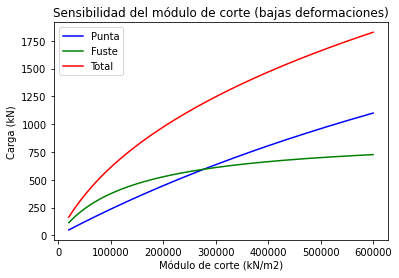

In [8]:
def pdp(g,nu,r,deltap,Qu_p1):
  pdp=deltap/((1/((2*np.pi*g*r)/(1-nu)))+((0.8*deltap)/Qu_p1))
  return pdp

gbp=np.linspace(20000,600000,300)
ybp=pdp(gbp,0.25,0.3,0.001,Qu_p1)

def pdf_s(g,l,h,nu,r,deltap,Qu_fs):
  pdf_s=deltap/((1/((g*h*2*r*np.pi))/(r*np.log10(2*l*(1-nu))))+((0.8*deltap)/Qu_fs))
  return pdf_s

def pdf_m(g,l,h,nu,r,deltap,Qu_fm):
  pdf_m=deltap/((1/((g*h*2*r*np.pi))/(r*np.log10(2*l*(1-nu))))+((0.8*deltap)/Qu_fm))
  return pdf_m

gbf=np.linspace(20000,600000,300)
ybfs=pdf_s(gbf,8,8,0.25,0.3,0.001,Qu_fs)
ybfm=pdf_m(gbf,4,4,0.25,0.3,0.001,Qu_fm)

plt.plot(gbp,ybp,"b", label="Punta")
plt.plot(gbf,ybfs+ybfm,"g", label="Fuste")
plt.plot(gbf,ybp+ybfs+ybfm,"r",label="Total")
plt.legend(loc="upper left")
plt.title("Sensibilidad del módulo de corte (bajas deformaciones)")
plt.xlabel("Módulo de corte (kN/m2)")
plt.ylabel("Carga (kN)")
plt.savefig("sensibilidad bajas def.png")


##Alta deformación (40mm)

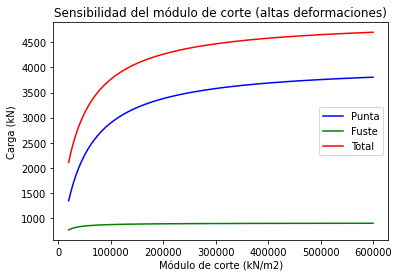

In [9]:
def pdp(g,nu,r,deltap,Qu_p1):
  pdp=deltap/((1/((2*np.pi*g*r)/(1-nu)))+((0.8*deltap)/Qu_p1))
  return pdp

gap=np.linspace(20000,600000,300)
yap=pdp(gap,0.25,0.3,0.04,Qu_p1)

def pdf_s(g,l,h,nu,r,deltap,Qu_fs):
  pdf_s=deltap/((1/((g*h*2*r*np.pi))/(r*np.log10(2*l*(1-nu))))+((0.8*deltap)/Qu_fs))
  return pdf_s

def pdf_m(g,l,h,nu,r,deltap,Qu_fm):
  pdf_m=deltap/((1/((g*h*2*r*np.pi))/(r*np.log10(2*l*(1-nu))))+((0.8*deltap)/Qu_fm))
  return pdf_m

gaf=np.linspace(20000,600000,300)
yafs=pdf_s(gaf,8,8,0.25,0.3,0.04,Qu_fs)
yafm=pdf_m(gaf,4,4,0.25,0.3,0.04,Qu_fm)

plt.plot(gap,yap,"b", label="Punta")
plt.plot(gaf,yafs+yafm,"g", label="Fuste")
plt.plot(gaf,yap+yafs+yafm,"r",label="Total")
plt.title("Sensibilidad del módulo de corte (altas deformaciones)")
plt.xlabel("Módulo de corte (kN/m2)")
plt.ylabel("Carga (kN)")
plt.legend(loc="center right")
plt.savefig("sensibilidad altas def.png")